<a href="https://colab.research.google.com/github/Hendrix8/Pattern_Recognition/blob/main/Assignment_4/hw4_%3C2405%3E.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [74]:
# uploading file to colab 
# when choosing run all, upload the files of the assignment.
from google.colab import files
uploaded = files.upload()

Saving dataset1.csv to dataset1 (1).csv


In [75]:
# importing libraries
import numpy as np # for computations
from numpy import linalg as la # faster notation
import matplotlib.pyplot as plt # for plotting 
import pandas as pd # for reading the files

In [76]:
# Extracting the data 
df = pd.read_csv("dataset1.csv")
data = df.to_numpy() # turning all data into one matrix (100,3)

# separating the classes
class0 = df[df["label"] == 0.0]
class1 = df[df["label"] == 1.0]

y = data[:, 0:2] # the features 
labels = data[:, 2] # the labels

# impementing the bias trick
ones = np.ones([y.shape[0]]) # array with 100 '1's 
ones = ones.reshape((ones.shape[0],1)) # shaping the ones to be (100,1)
y = np.append(y, ones, axis=1)
y[:, [0, 2]] = y[:, [2, 0]] # swaping the first column with the last
y[:, [1, 2]] = y[:, [2, 1]] # swapping the second column with the last

#Challenge (Bonus 10%): Proper Python code
Use only two for/while loops throughout the whole assignment.

#Exercise 1 (50%): Single-sample Perceptron
For this exercise you are going to use the dataset in the ‘dataset1.csv’ file. The dataset consists of 3 columns (the first and second are the features and the last are the labels) and 100 rows of 2-dimensional data.
You are assigned to design a linear classifier and train it with the gradient descent algorithm on the given dataset. More specifically, you will implement the Fixed-increment single-sample Perceptron (Fixed-increment = fixed learning rate, single-sample = one sample per weights’ update, Perceptron = the Perceptron learning criterion).



**Question 1** $ \, ) \,$ 

 Create a scatter plot of the dataset with different colors for each class. If you do
it correctly, you will be able to see what linearly separable data looks like. In theory, linearly separable data are the data which are separable by a linear model.

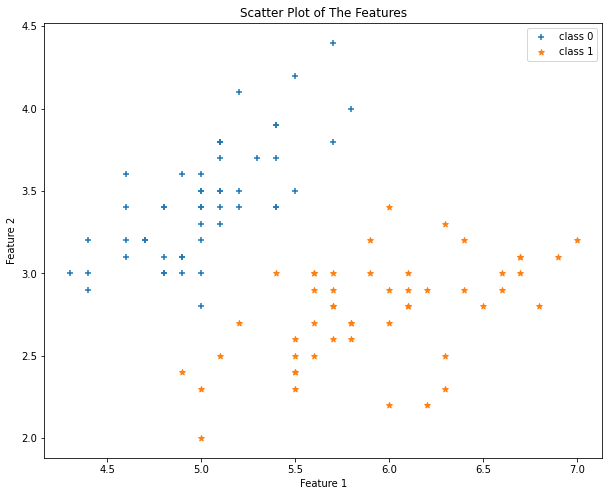

In [77]:
feature1_0 = class0["feature_1"].tolist() # feature_1 where label=0
feature1_1 = class1["feature_1"].tolist() # feature_1 where label=1
feature2_0 = class0["feature_2"].tolist() # feature_2 where label=0
feature2_1 = class1["feature_2"].tolist() # feature_2 where label=1

plt.figure(figsize=(10,8))

# naming the axis and the plot
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.title("Scatter Plot of The Features")

# plotting the features with different colors and markers
plt.scatter(feature1_0, feature2_0, label="class 0", marker="+")
plt.scatter(feature1_1, feature2_1, label="class 1", marker="*")

plt.legend()
plt.show()

**Question 2** $ \, ) \,$ 

Create a function named ‘train_single_sample’ which implements the Fixed-Increment Single-Sample Perceptron algorithm. The arguments of the function have to be the following:

a $\,) \, \ a := \ the \ parameters \ of \ the \ model \  \, ( \, weights \ + \ bias \,) $ 


b $ \,) \,  \ y := \ the \ data \ and \ the \ column \ of \ \ 
'1's \,( \, this \ is \ called \ the \ bias \ trick \,) $


c $\, ) \, \ labels := the \ labels \ of \ the \  samples \ in \ y$

d $ \, ) \, \ n\_iterations := \ the \ number \ of \  updates $

e $ \, ) \, \ lr := the  \ learning \ rate $

f $ \, ) \,  \ variable\_lr := False \ if \ fixed \ lr , \ True \ otherwise $

g $ \, ) \, \ verbose \ := \ If \ True \ print \ accuracy \ every \ \ 100 \sim 1000 \ \  iterations $

The return values of the function should be the following:

a $ \, ) \, \  a := \ the \ trained \ parameters $

b $ \, ) \, \ history :=  \ accuracy  \ throughout \ training \,( \, \ every \ 100 \sim 1000 \ iterations) $

we have our hypothesis function: 

$h_a \,( \,y \,) \, = g \,( \, a^\intercal \cdot y ) $

where  $ \ \ g(z)=\begin{cases}
    1, & \text{ $z \geq 0$}.\\
    0, & \text{ $z < 0 $}.
  \end{cases} $

The inputs of $h_a$ are the trained weights $a$ and a sample $y$. 
The value that is returned from function $h_a$ is 0 or 1 and depending on that value we classify the sample $y$.

The updating rule will be based on the Perceptron cost function.

$ J_p \, (\, a \, )\, = \sum_{y \in 𝒴} \, ( \, \delta_y a^\intercal  y\, )\,  $

where $𝒴$ is the set of all the misclassified samples, therefore this function expresses the samples $y$ that our model missclassifies.

also $\delta_y = 1 $ if $ y \in class_0$ and $\delta_y = -1$ if $ y \in class_1$ (I use $\delta_y$ instead of doing the "normalization")

Ideally we want our classifier to classify all samples correctly and so it makes sense to minimize $J_p$

We have : 

$ \large ∇ \normalsize J_p = \sum_{y \in 𝒴} \, ( \, \delta_y y \, ) $

Using this result and impelementing Gradient Decent with a learning rate $lr$ we get the updating rule : 

$a = a + lr \cdot \sum_{y \in 𝒴} \, ( \, \delta_y y \, ) $

When implementing the single-sample Perceptron we update for every single missclassified sample we find, and so the updating rule becomes 

$a = a + lr \cdot \, ( \, \delta_y y \, ) \, \, \, ∀y \in 𝒴 $

The method I will use to find if a sample is missclassified or not is by plugging it in the hypothesis function $h_a$ and then comparing it to the real label. With that logic we have $\delta_y =  \, ( \, label\_y - h_a(\, y \,) \, )$ and so the updating rule becomes : 

$a = a + lr ⋅ \, ( \, label\_y - h_a(\, y \,) \, ) \cdot y\, $

Where the quantity  $( \, label\_y - h_a(\, y \,) \, )$ returns a value in the set $ \{1,-1,0 \} $

When  $\, ( \, label\_y - h_a(\, y \,) \, ) = 1 $ that means we have predicted $\ 0 \ $ when the true value was $1$ and therefore we must add to the vector $a$ so that it's angle with $y$ gets more narrow and therefore the quantity $ a^\intercal \cdot y $ is more likely to be $\geq 0$, which implies that $h_a \,( \, y \, )\,$ is more likely to become $\ 1$

When  $\, ( \, label\_y - h_a(\, y \,) \, ) = -1 $ that means we have predicted $\ 1 \ $ when the true value was $0$ and therefore we must subtract from the vector $a$ so that its angle with $y$ is widened and therefore the quantity $ a^\intercal \cdot y $ is more likely to be $ < 0,$ which implies that $h_a \,( \, y \, )\,$ is more likely to become $ \ 0$

Lastly if  $\, ( \, label\_y - h_a(\, y \,) \, ) = 0 $ then we have predicted correctly and therefore the vector $a$ does not need modification.


In [78]:
def g(z): # this is the step function 
  return 0.0 if z < 0 else 1.0

def h(a, y): # this is the hypothesis function
  return g(a.T @ y)

# fixed-increment single-sample Perceptron
def train_single_sample(a, y, labels, n_iterations, lr, variable_lr=False, verbose=False):
  
  history = {} # this dictionary will contain the accuracy as value and the iteration as key
  iterr = 0
  index = 0
  accuracy_counter = 0
  iter_print_accuracy = np.random.randint(100,1000) # this is the first iteration index for printing accuracy info

  while iterr <= n_iterations:

    # storing the result because I will use it for the history list
    delta_y = labels[index] - h(a, y[index]) # determines if we predicted correctly 

    # this updates only the missclassified samples since if they are correct then the second term is 0
    a = a + lr * ( delta_y ) * y[index]

    iterr += 1 # adding one to the iteration
    index = (index + 1) % len(y) # this counter will go from 0 to 99 in circles

    # if variable learning rate is set to True then we change the learning rate
    if variable_lr and index != 0:
      lr = 1 / np.sqrt(index)

    if delta_y == 0: # if predicted correctly add one to the accuracy counter
      accuracy_counter += 1
    
    if index == 99:
      # resetting the accuracy counter for the next 100 iterations
      accuracy_counter = 0

    if iterr == iter_print_accuracy: 

      # dividing the result of the accuracy counter by the length of the sample
      accuracy = accuracy_counter / len(y)
      history[iterr] = accuracy# appending the accuracy (this happens every 100 iterations)

      # if verbose is true then print the accuracy 
      if verbose:
        print("Iteration : {} -> Accuracy : {}".format(iterr, accuracy))

      # updating the iter_print_accuracy for the next print
      iter_print_accuracy += np.random.randint(100,1000)

  return a, history 

**Question 3** $ \, ) \,$ 

Create a function named ‘plot_model’ which returns a scatter plot (as in step one) along with a linear model. More specifically, given the weights of a linear model, it should also plot a line on the figure for the model itself. (Hint: Your model is nothing more than a simple function. It returns a value Z for every x, y on the 2D space. Z is zero when x, y are on the line it represents. You could/should use the plt.contour function ;) )

For $y \in ℝ^3 $ where $y_0 = 1$ we get the decision line when $a^\intercal \cdot y = 0 \ $ and so we have : 

$ a^\intercal \cdot y = 0 \iff a_0 + a_1 ⋅ y_1 + a_2 ⋅ y_2 = 0 \iff 
y_2 = \normalsize - \large \frac{a_0}{a_2} \normalsize - \large \frac {a_1}{a_2} \normalsize \cdot y_1 $

So the decision line function has the following form 

$ decision\_line \,( \,x \, ) \, = \normalsize - \large \frac {a_1}{a_2} \normalsize \cdot x  \normalsize - \large \frac{a_0}{a_2} \ \ \ \ \ \normalsize ∀ x \in ℝ $ and $a_2 \neq 0$


In [79]:
# function for the decision line
def decision_line(a, x):
  return - a[1] / a[2] * x - a[0] / a[2] * np.ones(x.shape)

def plot_model(a):
  fig, ax = plt.subplots(figsize=(10,8))
  feature1_0 = class0["feature_1"].tolist() # feature_1 where label=0
  feature1_1 = class1["feature_1"].tolist() # feature_1 where label=1
  feature2_0 = class0["feature_2"].tolist() # feature_2 where label=0
  feature2_1 = class1["feature_2"].tolist() # feature_2 where label=1

  # naming the axis and the plot
  ax.set_xlabel("Feature 1")
  ax.set_ylabel("Feature 2")
  ax.set_title("Scatter Plot of The Features with Decision Line")

  # plotting the features with different colors and markers
  ax.scatter(feature1_0, feature2_0, label="class 0", marker="+")
  ax.scatter(feature1_1, feature2_1, label="class 1", marker="*")

  # ==========================================
  #             Desicion line 
  # ==========================================
  x_values = np.linspace(4, 7, 100)
  y_values = [decision_line(a, x_i) for x_i in x_values]

  # plotting the decision line 
  ax.plot(x_values, y_values, label="decision line", color="black", linestyle="--")
  ax.legend()

  return ax

**Question 4** $ \, ) \,$ 

Apply your model on the data using the function ‘train_single_sample’, for 10000 iterations with a learning rate of 1. Your function should print information about training if the ‘verbose’ argument is True every 100~1000 iterations. The printed information should look like this:
Iteration: {index of current iteration} --> accuracy: {current accuracy}

In [80]:
a = np.zeros((3,))# initializing a (and initializing it s.t. a_2 != 0)
a, history = train_single_sample(a, y, labels, n_iterations=10000, lr=1, verbose=True)

Iteration : 329 -> Accuracy : 0.29
Iteration : 956 -> Accuracy : 0.54
Iteration : 1503 -> Accuracy : 0.03
Iteration : 1803 -> Accuracy : 0.03
Iteration : 2010 -> Accuracy : 0.1
Iteration : 2298 -> Accuracy : 0.97
Iteration : 2755 -> Accuracy : 0.54
Iteration : 3075 -> Accuracy : 0.75
Iteration : 3902 -> Accuracy : 0.02
Iteration : 4830 -> Accuracy : 0.3
Iteration : 5753 -> Accuracy : 0.53
Iteration : 6317 -> Accuracy : 0.17
Iteration : 6737 -> Accuracy : 0.37
Iteration : 7417 -> Accuracy : 0.17
Iteration : 7915 -> Accuracy : 0.15
Iteration : 8044 -> Accuracy : 0.44
Iteration : 8852 -> Accuracy : 0.51
Iteration : 9404 -> Accuracy : 0.04
Iteration : 9570 -> Accuracy : 0.7


**Question 5** $ \, ) \,$ 

Plot the trained model using the function ‘plot_model’.

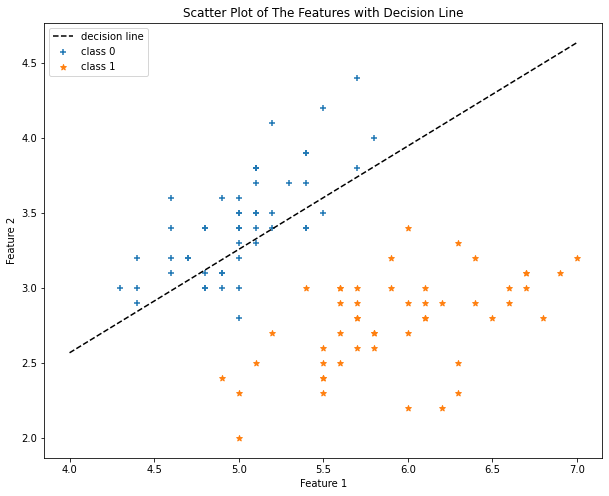

In [81]:
plot_model(a)
plt.show()

**Question 6** $ \, ) \,$ 

Repeat steps 4 and 5 but this time use a variable learning rate. The learning rate
should be equal to:

$ \Large \frac{1}{\sqrt{k}} \ \
\normalsize where  \ k = k + \, ( \, iter \ \% \ n \,)\,  $

$ iter := iteration index  $

$ n := \# samples $

Iteration : 571 -> Accuracy : 0.7
Iteration : 1098 -> Accuracy : 0.97
Iteration : 1567 -> Accuracy : 0.66
Iteration : 1814 -> Accuracy : 0.15
Iteration : 2655 -> Accuracy : 0.54
Iteration : 2818 -> Accuracy : 0.19
Iteration : 3454 -> Accuracy : 0.53
Iteration : 4222 -> Accuracy : 0.23
Iteration : 4813 -> Accuracy : 0.14
Iteration : 5019 -> Accuracy : 0.2
Iteration : 5527 -> Accuracy : 0.28
Iteration : 5968 -> Accuracy : 0.67
Iteration : 6642 -> Accuracy : 0.42
Iteration : 6885 -> Accuracy : 0.84
Iteration : 7504 -> Accuracy : 0.05
Iteration : 7714 -> Accuracy : 0.15
Iteration : 8512 -> Accuracy : 0.13
Iteration : 9269 -> Accuracy : 0.68


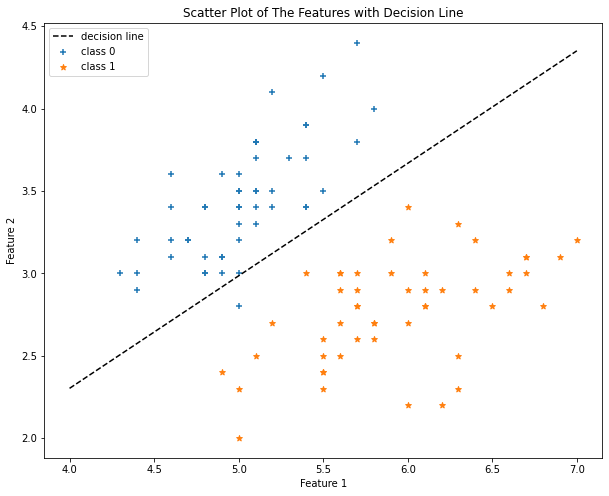

In [82]:
# Question 6.4
a = np.zeros((3,))# initializing a
a, history = train_single_sample(a, y, labels, n_iterations=10000, lr=1, variable_lr=True, verbose=True)

# Question 6.5
plot_model(a)
plt.show()

**Question 7** $ \, ) \,$ 

(Bonus 5%) Does one method seem to be better than the other (fixed learning rate vs variable learning rate)? If yes, why? (2-3 sentences)

From what information we can gather from the plots, it seems that variable learning rate performs better than fixed learning rate, meaning that with a variable learning rate, Gradiend Decent converges faster than with a fixed learning rate.

This happens because as we reach the minimum of the criterion function the curve becomes sharper and so if we make big steps we might have to go back again before we reach the minimum therefore it is more efficient to make smaller steps as we go. 

#Exercise 2 (50%): Batch Perceptron

For this exercise you are going to use the same dataset. You will again design a linear classifier and train it with the gradient descent algorithm. More specifically, you will implement the Batch Perceptron algorithm.

**Question 1** $ \, ) \,$ 

Create a function named ‘train_batch’ which implements the Batch Perceptron
algorithm. The arguments of the function have to be the following:

a $ \, ) \, \ a := \ the \ parameters \ of \ the \ model \ ( \ weights \ + \ bias \ ) $

b $\, ) \,\ y := \ the \ data \ and \ the \ column \ of \ '1's \ ( \ this \ is \ called \ the \ bias \ trick \ ) $


c $ \, ) \, \ labels := \ the \ labels \ of \ the \ samples \ in \ y $

d $ \, ) \, \ theta := \ the \ value \ for \ the \ theta \ criterion $

e $ \, ) \, \ batch\_size := \ the \ number \ of \ samples \ per \ weights’ \ update $

f $ \, ) \, \ lr := \ the \ learning \ rate $

g $ \,) \, \ variable\_lr := \ False \ if \ fixed \ lr \ , \ True \ otherwise $

h $ \, ) \, \ verbose := \ If \ True \ print \ accuracy \ every \ 100 \sim 1000 \ iterations $

The return values of the function should be the following:

c $\, ) \, \ a := \ the \ trained \ parameters $

d $ \, ) \, \ history := \ accuracy \ throughout \ training \ \,( \, \ every \ 100 \sim 1000 \ iterations \,) $

Again we have our hypothesis function: 

$h_a \,( \,y \,) \, = g \,( \, a^\intercal \cdot y ) $

where  $ \ \ g(z)=\begin{cases}
    1, & \text{ $z \geq 0$}.\\
    0, & \text{ $z < 0 $}.
  \end{cases} $

But now instead of updating when finding a single misclassified sample, we update when we find a collection of misclassified samples.

We have the Perceptron cost function 

$ J_p \, (\, a \, )\, = \sum_{y \in 𝒴} \, ( \, \delta_y a^\intercal  y \, )\,  $

and we will use Gradient Decent to minimize it : 

$a = a + lr \cdot \sum_{y \in 𝒴} \,( \,label\_y - h_a \,( \,y \,)\, \,)\, ⋅ y \,  $

In [83]:
def g(z): # this is the step function 
  return 0.0 if z < 0 else 1.0

def h(a, y): # this is the hypothesis function
  return g(a.T @ y)

def train_batch(a, y, labels, theta, lr, batch_size=1, n_iterations=10000, variable_lr=False, verbose=False):

  history = {} # this dictionary will contain the accuracy as value and the iteration as key
  misscl = [] # this will contain all the misclassified samples for each cycle
  iterr = 0
  index = 0
  accuracy_counter = 0
  iter_print_accuracy = np.random.randint(100,1000) # this is the first iteration index for printing accuracy info

  while iterr <= n_iterations:

    delta_y = labels[index] - h(a, y[index])

    if delta_y != 0.0: # if we get a missclassified example
      misscl.append(delta_y * y[index]) # then add that example to the misscl list multiplied by the delta so that the sign is correct
    
    if index == batch_size % len(y):
      a = a + lr * sum(misscl)

      if la.norm(lr * sum(misscl)) < theta: # checking if theta threshold is reached
        break
      misscl = [] # emptying the list for the next circle

    iterr += 1
    index = (index + 1) % len(y) # this counter will go from 0 to 99 in circles

    # if variable learning rate is set to True then we change the learning rate
    if variable_lr and index != 0:
      lr = 1 / np.sqrt(index)

    if delta_y == 0: # if predicted correctly add one to the accuracy counter
      accuracy_counter += 1
    
    if index == 99:
      # resetting the accuracy counter for the next 100 iterations
      accuracy_counter = 0


    if iterr == iter_print_accuracy: 

      # dividing the result of the accuracy counter by the length of the sample
      accuracy = accuracy_counter / len(y)
      history[iterr] = accuracy# appending the accuracy (this happens every 100 iterations)

      # if verbose is true then print the accuracy 
      if verbose:
        print("Iteration : {} -> Accuracy : {}".format(iterr, accuracy))

      # updating the iter_print_accuracy for the next print
      iter_print_accuracy += np.random.randint(100,1000)



  return a, history


**Question 2** $ \, ) \,$ 

Apply your model on the data using the function ‘train_batch’, for theta equal to 0.01 and a learning rate of 1. Your function should print information about training if the ‘verbose’ argument is True every 100~1000 iterations.

In [84]:
a = np.zeros((3,))# initializing a (and initializing it s.t. a_2 != 0)
a, history = train_batch(a, y, labels, theta=0.01, lr=1,batch_size=99, verbose=True)

Iteration : 644 -> Accuracy : 0.0
Iteration : 1106 -> Accuracy : 0.07
Iteration : 1971 -> Accuracy : 0.51
Iteration : 2670 -> Accuracy : 0.2
Iteration : 2990 -> Accuracy : 0.55
Iteration : 3599 -> Accuracy : 0.0
Iteration : 4547 -> Accuracy : 0.48
Iteration : 4987 -> Accuracy : 0.58
Iteration : 5429 -> Accuracy : 0.3
Iteration : 5821 -> Accuracy : 0.22
Iteration : 6273 -> Accuracy : 0.74
Iteration : 7086 -> Accuracy : 0.86
Iteration : 7795 -> Accuracy : 0.95
Iteration : 8437 -> Accuracy : 0.38
Iteration : 8677 -> Accuracy : 0.78
Iteration : 8891 -> Accuracy : 0.9
Iteration : 9372 -> Accuracy : 0.72


**Question 3** $ \, ) \,$ 

Plot the trained model using the function ‘plot_model’ from exercise 1.

<function matplotlib.pyplot.show>

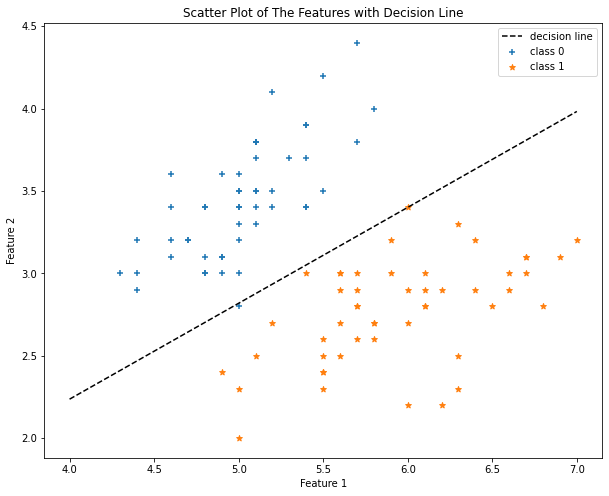

In [85]:
plot_model(a)
plt.show

**Question 4** $ \, ) \,$ 

Repeat steps 2 and 3 but this time use a variable learning rate. The learning rate
should be equal to:

$ \Large \frac{1}{\sqrt{k}} \ \
\normalsize where  \ k = k + \, ( \, iter \ \% \ n \,)\,  $

$ iter := iteration index  $

$ n := \# samples $

In [86]:
a = np.zeros((3,))# initializing a (and initializing it s.t. a_2 != 0)
a, history = train_batch(a, y, labels, theta=0.01, lr=1,batch_size=99, variable_lr=True, verbose=True)

Iteration : 515 -> Accuracy : 0.16
Iteration : 1352 -> Accuracy : 0.51
Iteration : 1965 -> Accuracy : 0.51
Iteration : 2074 -> Accuracy : 0.24
Iteration : 2885 -> Accuracy : 0.35
Iteration : 3307 -> Accuracy : 0.08
Iteration : 4270 -> Accuracy : 0.2
Iteration : 4488 -> Accuracy : 0.39
Iteration : 5074 -> Accuracy : 0.31
Iteration : 5341 -> Accuracy : 0.42
Iteration : 6249 -> Accuracy : 0.5
Iteration : 7142 -> Accuracy : 0.42
Iteration : 7839 -> Accuracy : 0.4
Iteration : 8678 -> Accuracy : 0.79
Iteration : 8809 -> Accuracy : 0.1
Iteration : 9311 -> Accuracy : 0.12
Iteration : 9987 -> Accuracy : 0.86


<function matplotlib.pyplot.show>

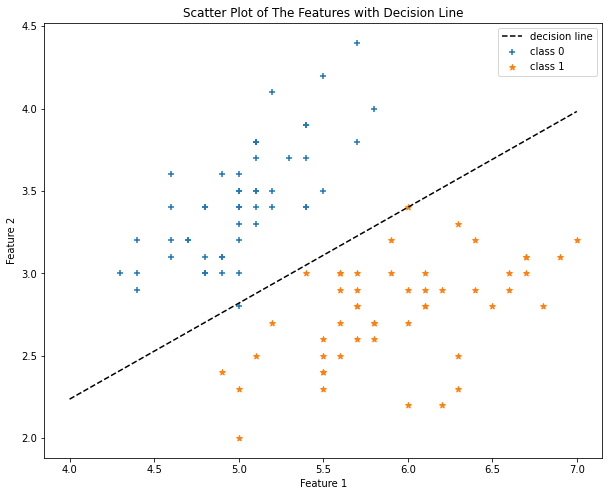

In [87]:
plot_model(a)
plt.show